In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
#Debido a la investigacion de los metodos de qiskit y el uso de compuertas se encontro tres 
#formas de realizar el producto tensorial, en dos de ellas se puede dibujar el cicuito y 
#en las tres de puede dibujar el statevector

In [3]:
#Construccion de dos circuitos individuales para los primeros dos metodos de solucion

In [4]:
#Construccion primer circuito
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cx(q[0], q[1])

#Construccion segundo circuito
q2 = QuantumRegister(2)
qc2 = QuantumCircuit(q2)
qc2.x(q2)
qc2.h(q2[0])
qc2.cx(q2[0], q2[1])

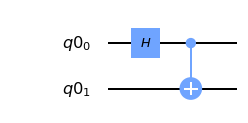

In [5]:
#Dibujo del circuito
qc.draw(output='mpl')

In [6]:
#State vector
backend = Aer.get_backend('statevector_simulator')
Statevector1 = execute(qc,backend).result().get_statevector()
array_to_latex(Statevector1, pretext="\\text{Statevector1 = }")

<IPython.core.display.Math object>

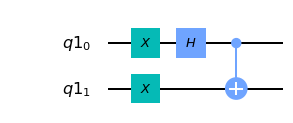

In [7]:
#Dibujo del segundo circuito
qc2.draw(output='mpl')

In [8]:
#State vector segundo circuito
backend = Aer.get_backend('statevector_simulator')
Statevector2 = execute(qc2,backend).result().get_statevector()
array_to_latex(Statevector2, pretext="\\text{Statevector2 = }")


<IPython.core.display.Math object>

In [9]:
#Primera, se convierten los circuitos antes creados en statevector y se ejecuta el metodo tensor
#dando como resultado el producto tensorial en otro statevector, este proporciona sus datos
#por medio del atributo data asi se puede dibujar en latex
final1 = Statevector.from_instruction(qc)
final2 = Statevector.from_instruction(qc2)
final3 = final1.tensor(final2)
array_to_latex(final3.data, pretext="\\text{Statevector Solution 1= }")

<IPython.core.display.Math object>

In [10]:
#Segundo, se utiliza la clase Operator que permite convertir varios objetos en Operators
#entre ellos un circuito, por lo tanto se convierten los dos en Operator y luego
#se realiza la multiplicacion tensorial mediante el metodo tensor el cual da como resultado otro 
#operator que es ademas una compuerta unitaria lo que permite adicionarla a un circuito y pintar este
#luego se pinta el statevector de este circuito y se comprueba que es el mismo resultado del metodo anterior
A = Operator(qc)
B = Operator(qc2)
finalal = A.tensor(B)
#Del operator se saca el numero de qubits que contiene
q3 = QuantumRegister(finalal.num_qubits)
#cr = ClassicalRegister(finalal.num_qubits)
qc3 = QuantumCircuit(q3)
qc3.append(finalal, q3)
#qc3.measure(q3, cr)

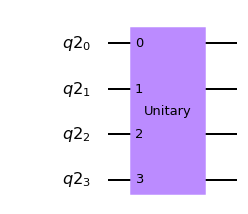

In [11]:
#Dibujo del circuito resultante
qc3.draw(output='mpl')

In [12]:
#Statevector resultante
backend = Aer.get_backend('statevector_simulator')
Statevector3 = execute(qc3,backend).result().get_statevector()
array_to_latex(Statevector3, pretext="\\text{Statevector Solution 2 = }")

<IPython.core.display.Math object>

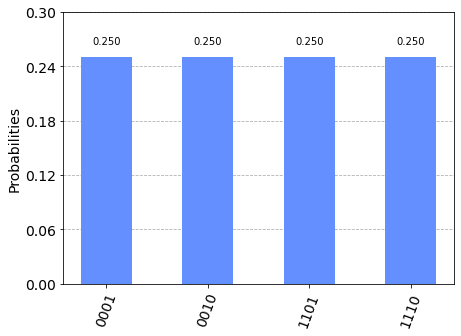

In [13]:
#Ejecucion del segundo metodo
results = execute(qc3,backend).result().get_counts()
plot_histogram(results)

In [14]:
#Tercere, se construyen ambos circuitos en uno solo, y luego al segudo qubit de cada circuito se le aplica
#la compuerta Y que equivale al efecto de X y Z, esto nos da el mismo producto tensorial pero a travez de
#comppuertas
q4 = QuantumRegister(4)
qc4 = QuantumCircuit(q4)
qc4.x(q4[2])
qc4.x(q4[3])
qc4.h(q4[0])
qc4.cx(q4[0], q4[1])
qc4.y(q4[1])
qc4.h(q4[2])
qc4.cx(q4[2], q4[3])
qc4.y(q4[3])

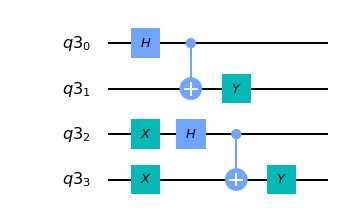

In [15]:
#Dibujo del circuito
qc4.draw(output='mpl')

In [16]:
#Statevector resultante
backend = Aer.get_backend('statevector_simulator')
Statevector4 = execute(qc4,backend).result().get_statevector()
array_to_latex(Statevector4, pretext="\\text{Statevector Solution 3 = }")

<IPython.core.display.Math object>

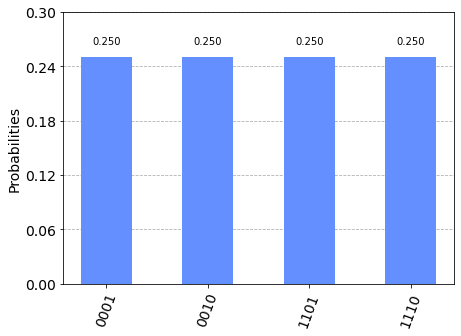

In [17]:
#Ejecucion solo del ultimo metodo
results = execute(qc4,backend).result().get_counts()
plot_histogram(results)